# Fetal Health Classification using Decision Tree Classifier

First, let us perform exploratory data analysis to know about the attributes, size and null values present in our dataset.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data1.csv')
print(data.shape)
print(data.head())
print(data.info())

(1450, 22)
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0             132          0.006           0.000                 0.006   
1             133          0.003           0.000                 0.008   
2             134          0.003           0.000                 0.008   
3             132          0.007           0.000                 0.008   
4             131          0.005           0.072                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.003                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.000                   0.0                       0.0   
4                0.003                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                      

Splitting the dataset into training set and test set, using 80% of the data for training and 20% for testing.

In [26]:
from sklearn.model_selection import train_test_split
X = data.drop('fetal_health', axis=1)
Y = data['fetal_health']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train.shape, X_test.shape

((1160, 21), (290, 21))

Using the training data to train the Decision Tree Classifier.

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

Testing the performance of the Decision Tree on test data using metrics like precision, recall and f1-score.

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
Y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.classification_report(Y_test, Y_pred, digits=3))

[[239   7   0]
 [  3  31   0]
 [  0   2   8]]
              precision    recall  f1-score   support

           1      0.988     0.972     0.980       246
           2      0.775     0.912     0.838        34
           3      1.000     0.800     0.889        10

    accuracy                          0.959       290
   macro avg      0.921     0.894     0.902       290
weighted avg      0.963     0.959     0.960       290



Plotting the Decision Tree for visualization purpose.

In [29]:
from sklearn import tree
fig = plt.figure(figsize=(150,150))
tree_plot = tree.plot_tree(clf, feature_names=X.columns, class_names=np.unique(Y).astype('str'), filled=True)

Saving the plot as a .png file.

In [30]:
fig.savefig("DT1.png")

Defining a function to plot the AUC-ROC curve which will help in evaluating the performance of our model.

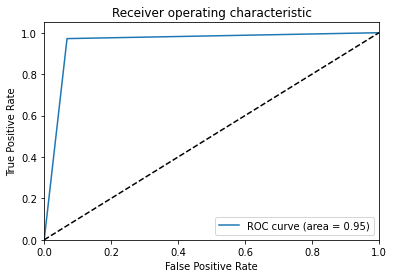

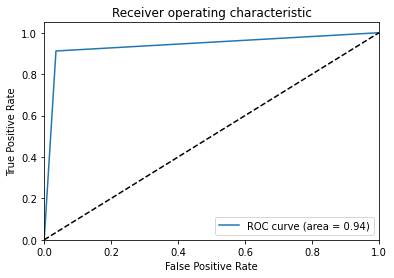

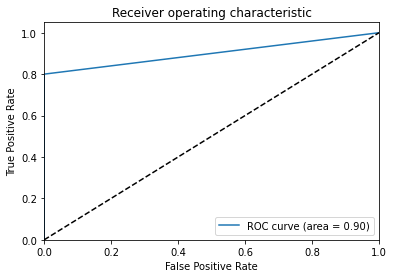

In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
def get_AUC_ROC_curve(Y_test, Y_pred, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 3
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
Y_test_bin = label_binarize(Y_test, classes = [1,2,3])
Y_pred_bin = label_binarize(Y_pred, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, Y_pred_bin, 3)

Plotting Accuracy vs Depth graph to study how depth of the Decision Tree affects its accuracy.

Max depth of the DT = 12


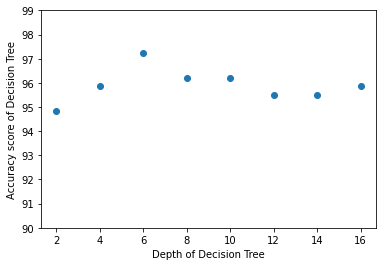

In [32]:
n = 8
x_axis = [n]
y_axis = [n]
for i in range(n):
    dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=(i+1)*2)
    dt_en.fit(X_train, Y_train)
    y_pred_en = dt_en.predict(X_test)
    x_axis.append((i+1)*2)
    y_axis.append(accuracy_score(Y_test, y_pred_en)*100)
print("Max depth of the DT = "+str(clf.tree_.max_depth))
plt.ylim([90, 99])
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy score of Decision Tree')
plt.plot(x_axis, y_axis, 'o')
plt.show()

Now, let us vary different parameters of the Decision Tree and observe its impact on performance. First we are changing the criterion from 'entropy' to 'gini'.

[[238   8   0]
 [  6  28   0]
 [  0   2   8]]
              precision    recall  f1-score   support

           1      0.975     0.967     0.971       246
           2      0.737     0.824     0.778        34
           3      1.000     0.800     0.889        10

    accuracy                          0.945       290
   macro avg      0.904     0.864     0.879       290
weighted avg      0.948     0.945     0.946       290



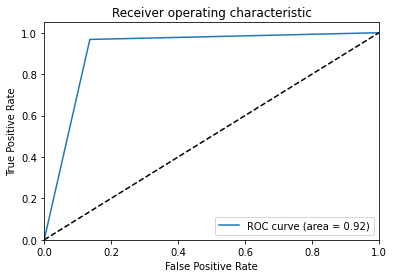

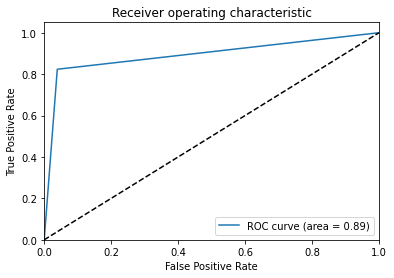

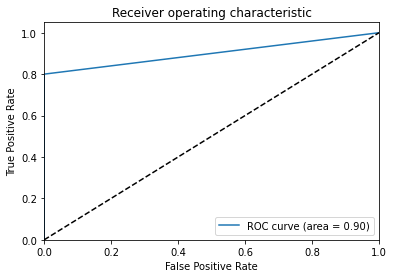

In [33]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini.fit(X_train, Y_train)
y_pred_gini = clf_gini.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_gini))
print(metrics.classification_report(Y_test, y_pred_gini, digits=3))
Y_test_bin = label_binarize(Y_test, classes = [1,2,3])
y_pred_bin = label_binarize(y_pred_gini, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Changing the value of splitter to 'random' from its default value 'best' and keeping all other parameters default.

[[238   8   0]
 [  7  27   0]
 [  1   0   9]]
              precision    recall  f1-score   support

           1      0.967     0.967     0.967       246
           2      0.771     0.794     0.783        34
           3      1.000     0.900     0.947        10

    accuracy                          0.945       290
   macro avg      0.913     0.887     0.899       290
weighted avg      0.946     0.945     0.945       290



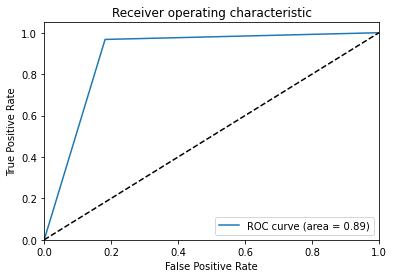

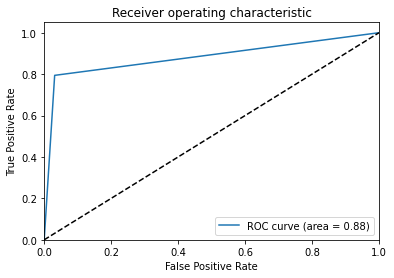

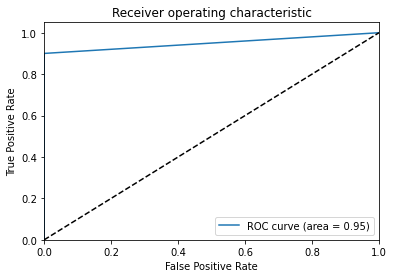

In [34]:
clf_split_random = DecisionTreeClassifier(criterion='entropy', random_state=1, splitter='random')
clf_split_random.fit(X_train, Y_train)
y_pred_random = clf_split_random.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_random))
print(metrics.classification_report(Y_test, y_pred_random, digits=3))
y_pred_bin = label_binarize(y_pred_random, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Varying min_samples_split from its default value = 2.

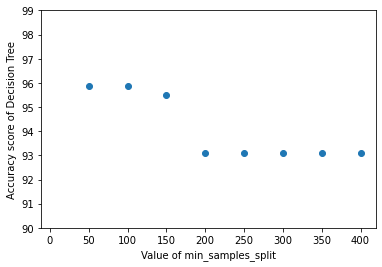

[[245   1   0]
 [  9  25   0]
 [  0   2   8]]
              precision    recall  f1-score   support

           1      0.965     0.996     0.980       246
           2      0.893     0.735     0.806        34
           3      1.000     0.800     0.889        10

    accuracy                          0.959       290
   macro avg      0.952     0.844     0.892       290
weighted avg      0.957     0.959     0.957       290



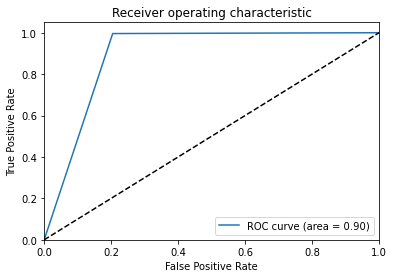

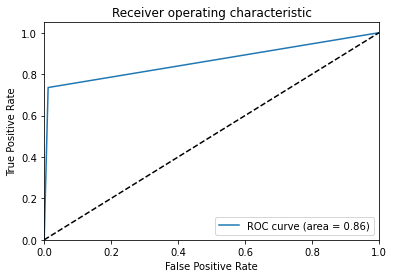

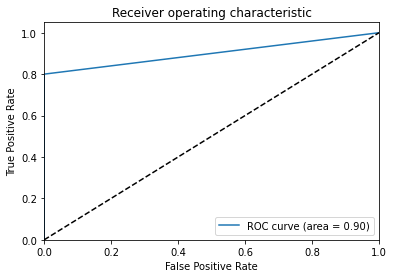

In [35]:
n = 8
x_axis = [n]
y_axis = [n]
for i in range(1,n+1):
    dt_en = DecisionTreeClassifier(criterion='entropy', random_state=1, min_samples_split = i*50)
    dt_en.fit(X_train, Y_train)
    y_pred_en = dt_en.predict(X_test)
    x_axis.append(i*50)
    y_axis.append(accuracy_score(Y_test, y_pred_en)*100)
plt.ylim([90, 99])
plt.xlabel('Value of min_samples_split')
plt.ylabel('Accuracy score of Decision Tree')
plt.plot(x_axis, y_axis, 'o')
plt.show()
clf = DecisionTreeClassifier(criterion='entropy', random_state=1, min_samples_split=100) # Training a DT for min_samples_split=100
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred, digits=3))
y_pred_bin = label_binarize(y_pred, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Varying min_samples_leaf from its default value = 1.

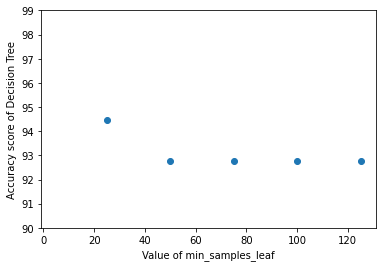

[[243   3   0]
 [  8  25   1]
 [  1   3   6]]
              precision    recall  f1-score   support

           1      0.964     0.988     0.976       246
           2      0.806     0.735     0.769        34
           3      0.857     0.600     0.706        10

    accuracy                          0.945       290
   macro avg      0.876     0.774     0.817       290
weighted avg      0.942     0.945     0.942       290



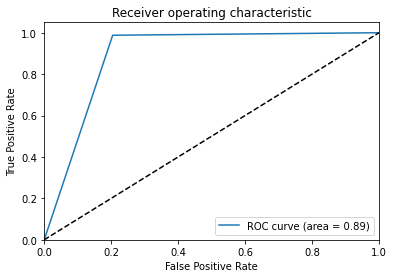

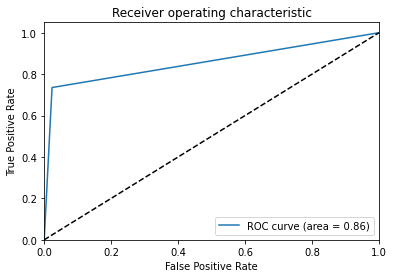

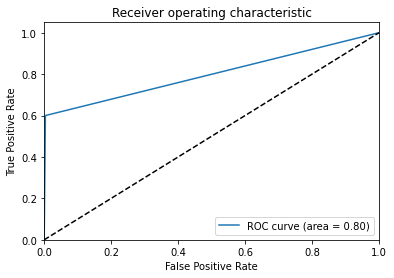

In [36]:
n = 5
x_axis = [n]
y_axis = [n]
for i in range(1,n+1):
    dt_en = DecisionTreeClassifier(criterion='entropy', random_state=1, min_samples_leaf = i*25)
    dt_en.fit(X_train, Y_train)
    y_pred_en = dt_en.predict(X_test)
    x_axis.append(i*25)
    y_axis.append(accuracy_score(Y_test, y_pred_en)*100)
plt.ylim([90, 99])
plt.xlabel('Value of min_samples_leaf')
plt.ylabel('Accuracy score of Decision Tree')
plt.plot(x_axis, y_axis, 'o')
plt.show()
clf = DecisionTreeClassifier(criterion='entropy', random_state=1, min_samples_leaf=25) # Training a DT for min_samples_leaf=25
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred, digits=3))
y_pred_bin = label_binarize(y_pred, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Changing max_features from its default value = None, to max_features = 'log2'.

[[242   4   0]
 [  9  25   0]
 [  1   2   7]]
              precision    recall  f1-score   support

           1      0.960     0.984     0.972       246
           2      0.806     0.735     0.769        34
           3      1.000     0.700     0.824        10

    accuracy                          0.945       290
   macro avg      0.922     0.806     0.855       290
weighted avg      0.944     0.945     0.943       290



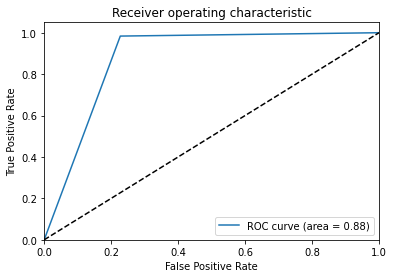

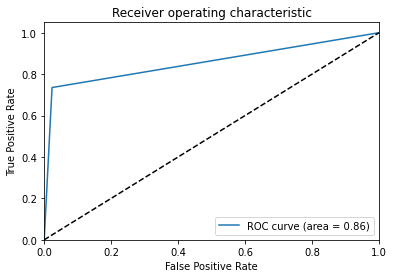

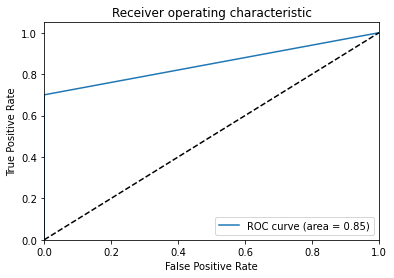

In [37]:
clf_max_features = DecisionTreeClassifier(criterion='entropy', random_state=1, max_features='log2')
clf_max_features.fit(X_train, Y_train)
y_pred_max_features = clf_max_features.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_max_features))
print(metrics.classification_report(Y_test, y_pred_max_features, digits=3))
y_pred_bin = label_binarize(y_pred_max_features, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Varying class_weight from its default value=None, to class_weight = 'balanced'.

[[237   9   0]
 [  4  30   0]
 [  0   3   7]]
              precision    recall  f1-score   support

           1      0.983     0.963     0.973       246
           2      0.714     0.882     0.789        34
           3      1.000     0.700     0.824        10

    accuracy                          0.945       290
   macro avg      0.899     0.849     0.862       290
weighted avg      0.952     0.945     0.947       290



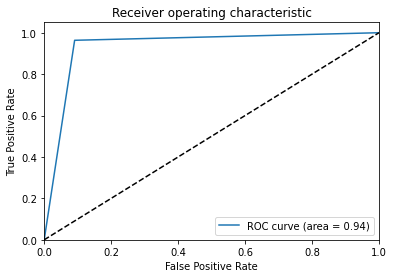

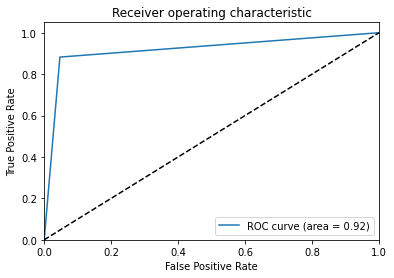

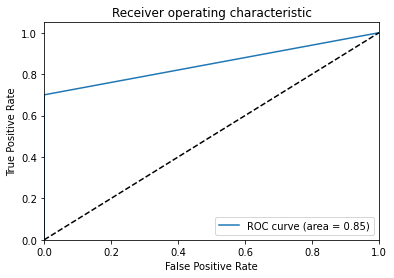

In [38]:
clf_class_weight = DecisionTreeClassifier(criterion='entropy', random_state=1, class_weight = 'balanced')
clf_class_weight.fit(X_train, Y_train)
y_pred_class_weight = clf_class_weight.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_class_weight))
print(metrics.classification_report(Y_test, y_pred_class_weight, digits=3))
y_pred_bin = label_binarize(y_pred_class_weight, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Varying max_leaf_nodes from its deafult value = None.

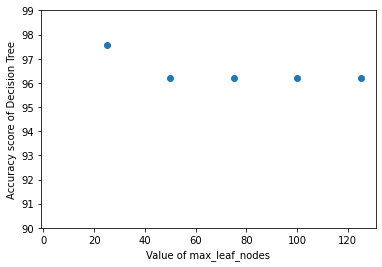

[[243   3   0]
 [  2  32   0]
 [  0   2   8]]
              precision    recall  f1-score   support

           1      0.992     0.988     0.990       246
           2      0.865     0.941     0.901        34
           3      1.000     0.800     0.889        10

    accuracy                          0.976       290
   macro avg      0.952     0.910     0.927       290
weighted avg      0.977     0.976     0.976       290



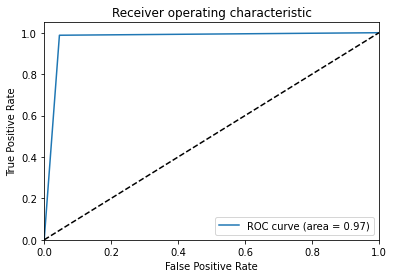

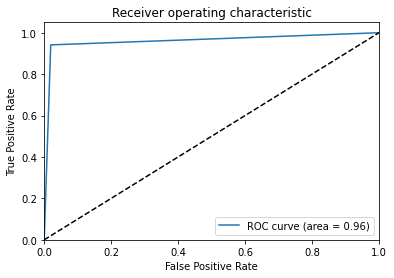

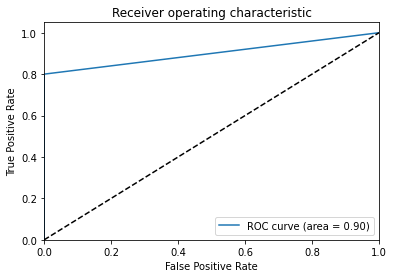

In [39]:
n = 5
x_axis = [n]
y_axis = [n]
for i in range(1,n+1):
    dt_en = DecisionTreeClassifier(criterion='entropy', random_state=1, max_leaf_nodes = i*25)
    dt_en.fit(X_train, Y_train)
    y_pred_en = dt_en.predict(X_test)
    x_axis.append(i*25)
    y_axis.append(accuracy_score(Y_test, y_pred_en)*100)
plt.ylim([90, 99])
plt.xlabel('Value of max_leaf_nodes')
plt.ylabel('Accuracy score of Decision Tree')
plt.plot(x_axis, y_axis, 'o')
plt.show()
clf = DecisionTreeClassifier(criterion='entropy', random_state=1, max_leaf_nodes=25) # Training a DT for max_leaf_nodes=25
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred, digits=3))
y_pred_bin = label_binarize(y_pred, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Now let us prune our decision tree using pre-pruning techniques, For eg GridSearchCV.

Initial score:  0.9551724137931036
Initial parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}
[[244   2   0]
 [  8  26   0]
 [  1   2   7]]
              precision    recall  f1-score   support

           1      0.964     0.992     0.978       246
           2      0.867     0.765     0.812        34
           3      1.000     0.700     0.824        10

    accuracy                          0.955       290
   macro avg      0.944     0.819     0.871       290
weighted avg      0.954     0.955     0.953       290



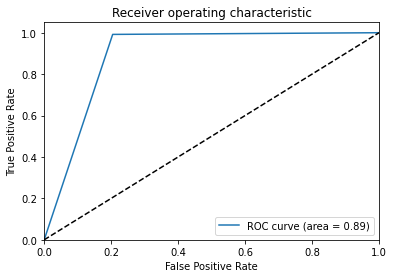

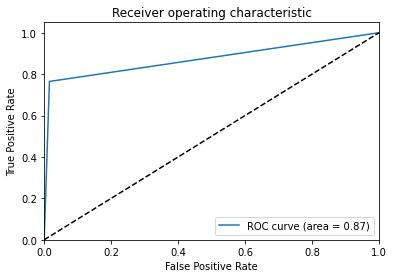

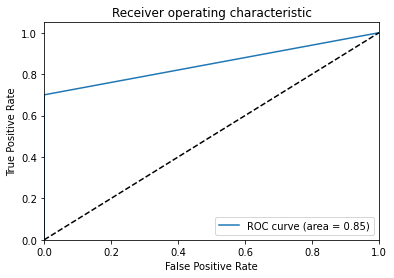

In [40]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {'max_depth':[2,4,6,8,10], 'min_samples_split':[20,40,60,80,100], 'min_impurity_decrease':[0.0001, 0.0005, 0.001, 0.005, 0.01]}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), parameter_grid, cv=5, n_jobs=1)
gridSearch.fit(X_train, Y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)
p1 = gridSearch.best_params_['max_depth'] # Now we will use these best parameter values for our model
p2 = gridSearch.best_params_['min_samples_split']
p3 = gridSearch.best_params_['min_impurity_decrease']
clf = DecisionTreeClassifier(max_depth = p1, min_samples_split = p2, min_impurity_decrease = p3)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred, digits=3))
y_pred_bin = label_binarize(y_pred, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

The above Decision Tree has the best performance obtained so far. Visualizing the decision tree after pruning.

In [41]:
fig = plt.figure(figsize=(150,150))
tree_plot = tree.plot_tree(clf, feature_names=X.columns, class_names=np.unique(Y).astype('str'), filled=True)

Saving the above visualization as a .png file.

In [42]:
fig.savefig("DT2")

Saving this Decision Tree Classifier.

In [43]:
import pickle
decision_tree_filename = "decision_tree_classifier_FHC.pkl"
decision_tree_model_pkl = open(decision_tree_filename, 'wb')
pickle.dump(clf, decision_tree_model_pkl)
decision_tree_model_pkl.close()

Now, let us use Hoeffding Tree Classifier to train our decision tree.

In [44]:
x = data.drop('fetal_health', axis=1)
y = data['fetal_health']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape

((1160, 21), (290, 21))

Using Hoeffding Tree Classifier.

In [45]:
from skmultiflow.trees import HoeffdingTreeClassifier
clf_hoeff = HoeffdingTreeClassifier()
x_train_numpy = x_train.to_numpy()
y_train_numpy = y_train.to_numpy()
clf_hoeff.fit(x_train_numpy, y_train_numpy)

HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                        leaf_prediction='nba', max_byte_size=33554432,
                        memory_estimate_period=1000000, nb_threshold=0,
                        no_preprune=False, nominal_attributes=None,
                        remove_poor_atts=False, split_confidence=1e-07,
                        split_criterion='info_gain', stop_mem_management=False,
                        tie_threshold=0.05)

Evaluating the performance of this model.

accuracy of the model = 0.7655172413793103
precision of the model = 0.32187088274044795
recall of the model = 0.32187088274044795


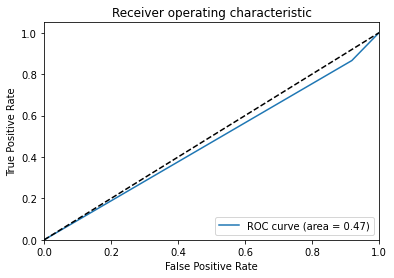

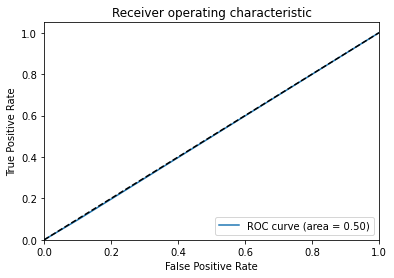

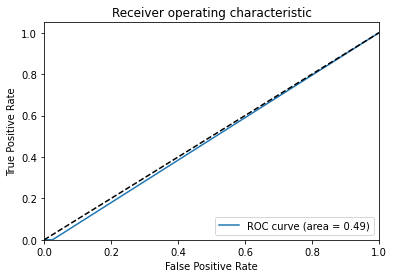

In [46]:
y_pred_numpy = clf_hoeff.predict(x_test.to_numpy())
y_pred_bin = pd.DataFrame(y_pred_numpy)
y_pred_bin = label_binarize(y_pred, classes=[1,2,3])
y_test_bin = label_binarize(y_test, classes=[1,2,3])
accuracy = accuracy_score(y_test_bin, y_pred_bin)
print("accuracy of the model = "+str(accuracy))
precision = precision_score(y_test_bin, y_pred_bin, average='macro')
print("precision of the model = "+str(precision))
recall = recall_score(y_test_bin, y_pred_bin, average='macro')
print("recall of the model = "+str(recall))
get_AUC_ROC_curve(y_test_bin, y_pred_bin, 3)

Importing new data so that we can augment it with our existing model clf_hoeff.

In [47]:
data_2 = pd.read_csv('data2.csv')
x2 = data_2.drop('fetal_health', axis=1)
y2 = data_2['fetal_health']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2)
x2_train.shape, x2_test.shape

((540, 21), (136, 21))

Now we have data_2 available with us, so we can extend our model clf_hoeff to this new data without training our model from scratch.

accuracy of the model = 0.8308823529411765
precision of the model = 0.7840422931182006
recall of the model = 0.7086681434507521


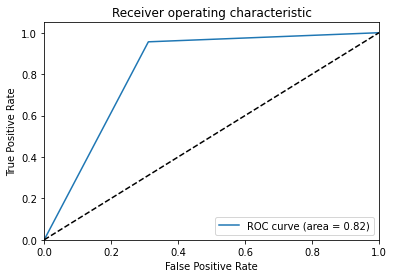

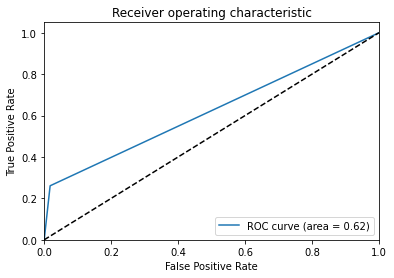

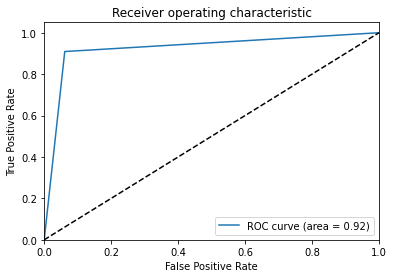

In [48]:
x2_train_numpy = x2_train.to_numpy()
y2_train_numpy = y2_train.to_numpy()
clf_hoeff = clf_hoeff.partial_fit(x2_train_numpy, y2_train_numpy)
y2_pred_numpy = clf_hoeff.predict(x2_test.to_numpy())
y2_pred = pd.DataFrame(y2_pred_numpy)
y2_pred = label_binarize(y2_pred, classes=[1,2,3])
y2_test = label_binarize(y2_test, classes=[1,2,3])
accuracy = accuracy_score(y2_test, y2_pred)
print("accuracy of the model = "+str(accuracy))
precision = precision_score(y2_test, y2_pred, average='macro')
print("precision of the model = "+str(precision))
recall = recall_score(y2_test, y2_pred, average='macro')
print("recall of the model = "+str(recall))
get_AUC_ROC_curve(y2_test, y2_pred, 3)